# Class in Object Oriented Programming


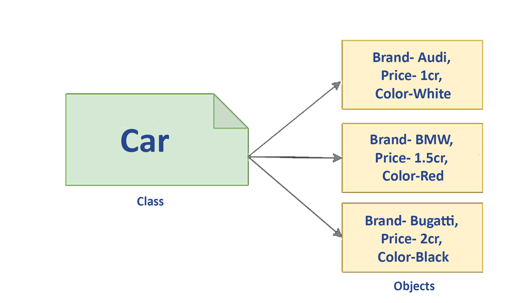


In [1]:
a = 32
print(type(a))

<class 'int'>


In [2]:
b = 24.5
print(type(b))

<class 'float'>


In [3]:
c = False
print(type(c))

<class 'bool'>


In [4]:
d = "ETLHive"
print(type(d))

<class 'str'>


In [5]:
e = [1, 2, 3, 4, 5]
print(type(e))

<class 'list'>


In [6]:
g = {
    "roll_no": [101, 102, 103],
    "name": ["Sarthak", "Raman", "Aditi"],
    "marks": [89, 91, 75],
}
print(type(g))

<class 'dict'>


In [7]:
import pandas as pd

df = pd.DataFrame(g)
df

,roll_no,name,marks
0,101,Sarthak,89
1,102,Raman,91
2,103,Aditi,75


In [8]:
print(type(df))

<class 'pandas.core.frame.DataFrame'>


### Attributes of class dataframe


In [9]:
df.columns

Index(['roll_no', 'name', 'marks'], dtype='object')

In [10]:
list(df.index)

[0, 1, 2]

In [11]:
df.shape

(3, 3)

In [12]:
df.dtypes

roll_no     int64
name       object
marks       int64
dtype: object

### Methods (Functions) of class Dataframe


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   roll_no  3 non-null      int64 
 1   name     3 non-null      object
 2   marks    3 non-null      int64 
dtypes: int64(2), object(1)
memory usage: 204.0+ bytes


In [14]:
df.sort_values(by="marks", ascending=False)

,roll_no,name,marks
1,102,Raman,91
0,101,Sarthak,89
2,103,Aditi,75


In [15]:
df.isna().sum()

roll_no    0
name       0
marks      0
dtype: int64

In [16]:
df.agg({"marks": "mean"})

marks    85.0
dtype: float64

### Creating a user defined class


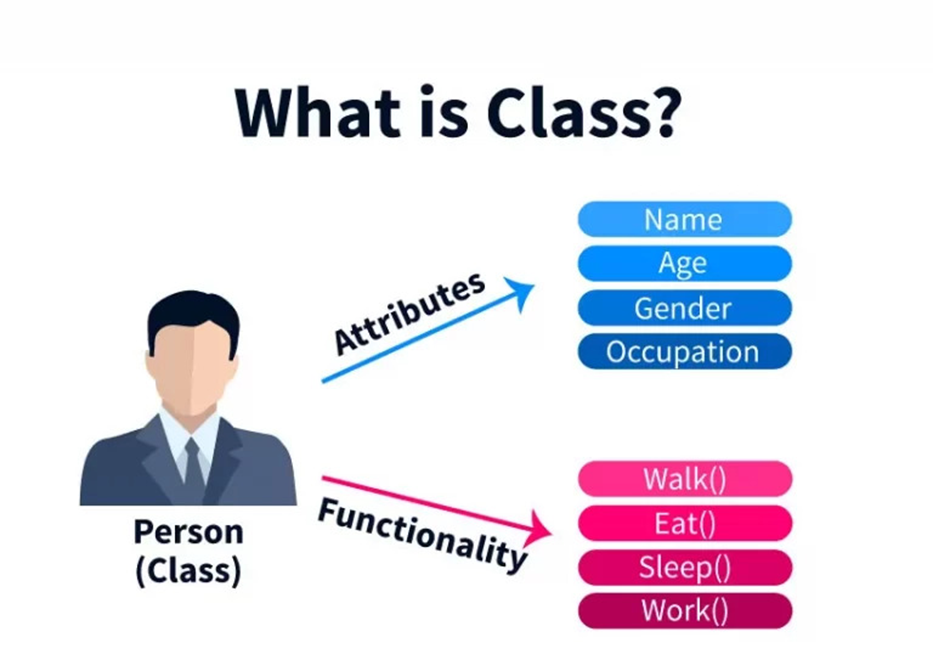


In [17]:
class Person:

    # First function is a construtor function __init__
    def __init__(self, name: str, age: int, gender: str, occupation: str):
        self.name = name
        self.age = age
        self.gender = gender
        self.occupation = occupation

    # Extra functionality for class
    def talk(self):
        print(f"Hi there my name is {self.name}")
        print(f"I am currently {self.age} years old")
        print(f"I am {self.gender}")
        print(f"I work as a {self.occupation}")

In [18]:
p1 = Person(name="Sarthak", age=23, gender="male", occupation="Engg")

In [19]:
p1

In [20]:
print(type(p1))

<class '__main__.Person'>


## \_\_main\_\_ reffers to the current file i am working on


### Attributes of class person


In [21]:
p1.name

'Sarthak'

In [22]:
p1.age

23

In [23]:
p1.gender

'male'

In [24]:
p1.occupation

'Engg'

### Method talk for class Person


In [25]:
p1.talk()

Hi there my name is Sarthak
I am currently 23 years old
I am male
I work as a Engg


In [26]:
p2 = Person("Aditi", 28, "female", "HR")
type(p2)

__main__.Person

In [27]:
p2.name

'Aditi'

In [28]:
p2.age

28

In [29]:
p2.gender

'female'

In [30]:
p2.occupation

'HR'

### Modifying the age


In [31]:
p2.age = 29

In [32]:
p2.age

29

In [33]:
p2.talk()

Hi there my name is Aditi
I am currently 29 years old
I am female
I work as a HR


### Some disvantage of creating classes directly


In [34]:
p3 = Person(name=23, age="Rahul", gender="Engg", occupation="male")

In [35]:
p3.name

23

In [36]:
p3.age

'Rahul'

In [37]:
p3.gender

'Engg'

In [38]:
p3.occupation

'male'

In [39]:
p3.talk()

Hi there my name is 23
I am currently Rahul years old
I am Engg
I work as a male


In [40]:
p3

### Invalid inputs work fine by creating class directly


### Dataclasses in python


In [41]:
isinstance("ABC", int)

False

In [42]:
isinstance(45.4, float)

True

In [43]:
a = ["A", "B", "C"]
print("\n".join(a))

A
B
C


In [44]:
from dataclasses import dataclass
from typing import Literal

In [45]:
@dataclass
class Person2:

    name: str
    age: int
    gender: Literal["male", "female"]
    occupation: str

    def __post_init__(self):
        errors = []

        if not isinstance(self.name, str):
            errors.append("name should be a string")
        if not isinstance(self.age, int) or self.age <= 0:
            errors.append("Age should be a positive integer")
        if self.gender not in ["male", "female"]:
            errors.append("Gender should be either male or female")
        if not isinstance(self.occupation, str):
            errors.append("Occupation should be a string")

        if errors:
            raise ValueError("\n".join(errors))

    def introduce(self):
        print(f"My name is {self.name}")
        print(f"I am currently {self.age} years old")
        print(f"I am a {self.gender}")
        print(f"I work as a : {self.occupation}")

In [46]:
p3 = Person2(name="Raman", age=20, gender="male", occupation="Sales")

In [47]:
p3

Person2(name='Raman', age=20, gender='male', occupation='Sales')

In [48]:
type(p3)

__main__.Person2

In [49]:
p3.name

'Raman'

In [50]:
p3.age

20

In [51]:
p3.gender

'male'

In [52]:
p3.occupation

'Sales'

In [53]:
p3.introduce()

My name is Raman
I am currently 20 years old
I am a male
I work as a : Sales


In [54]:
p4 = Person2(name=23, age=-25, gender="M", occupation=False)

ValueError: name should be a string
Age should be a positive integer
Gender should be either male or female
Occupation should be a string

In [56]:
p4 = Person2(name="Rahul", age=-23, gender="male", occupation="Purchase")

ValueError: Age should be a positive integer